In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
ms = pd.read_csv('../data/microsoft.csv', index_col='Date', parse_dates=True)

# Create a new Column in the DataFrame(1) - Price difference

In [19]:
#Create a new column PriceDiff in the DataFrame ms
ms['PriceDiff'] = ms['Close'].shift(-1) - ms['Close']

In [21]:
print(ms['PriceDiff'].loc['2015-01-05'])

-0.6799999999999997


# Create a new column in the DataFrame (2) - Daily return
Daily Return is calcuated as PriceDiff/Close

In [22]:
ms['Return'] = ms['PriceDiff'] / ms['Close']

In [23]:
#Run this code to print the return on 2015-01-05
print(ms['Return'].loc['2015-01-05'])

-0.014677314281143345


# Create a new column in the DataFrame using List Comprehension - Direction

In [26]:
ms['Direction'] = [1 if ms['PriceDiff'].loc[i] > 0 else 0 for i in ms.index]
#por cada index, verifica se o price diff desse dia é maior que 0 ou menor e a
# partir daí faz o resto

DatetimeIndex(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26',
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-05'],
              dtype='datetime64[ns]', name='Date', length=780, freq=None)


In [25]:
# Run the following code to show the price difference on 2015-01-05
print('Price difference on {} is {}. direction is {}'.format('2015-01-05', 
        ms['PriceDiff'].loc['2015-01-05'], ms['Direction'].loc['2015-01-05']))

Price difference on 2015-01-05 is -0.6799999999999997. direction is 0


# Create a new column in the DataFrame using Rolling Window calculation (.rolling()) - Moving average

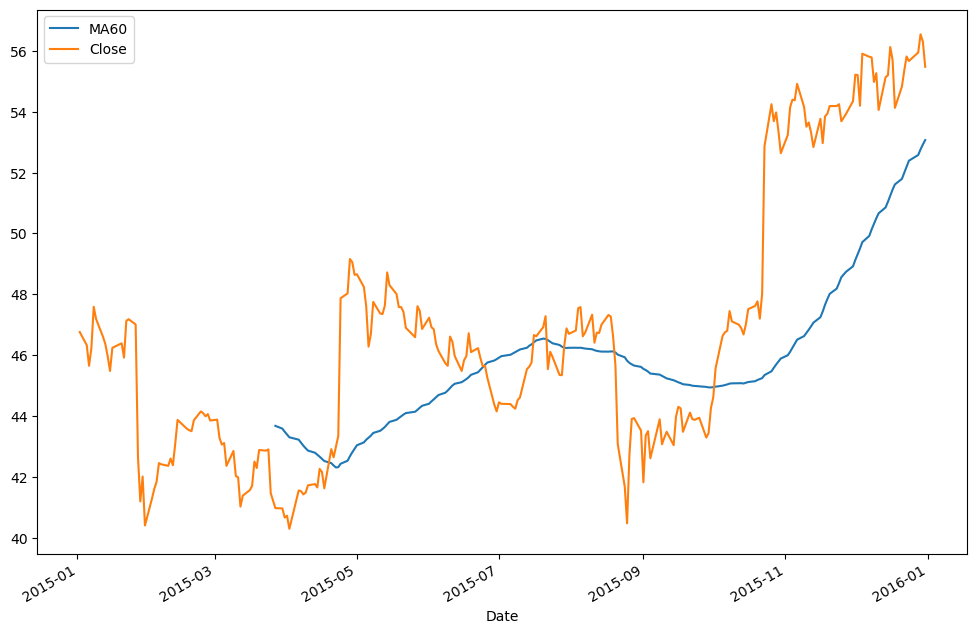

In [28]:
ms['ma60'] = ms['Close'].rolling(60).mean()

#plot the MA
plt.figure(figsize=(12,8))
ms['ma60'].loc['2015-01-01':'2015-12-31'].plot(label='MA60')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()